In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fake.csv', index_col='uuid', dtype = {'title': str, 'text': str, 'main_img_url': str})

In [3]:
df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [4]:
df.columns

Index(['ord_in_thread', 'author', 'published', 'title', 'text', 'language',
       'crawled', 'site_url', 'country', 'domain_rank', 'thread_title',
       'spam_score', 'main_img_url', 'replies_count', 'participants_count',
       'likes', 'comments', 'shares', 'type'],
      dtype='object')

## Different types of fake news

In [5]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

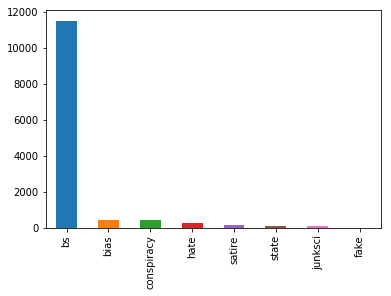

In [6]:
df['type'].value_counts().plot(kind='bar')

In [7]:
# filter by image url not NA
df = df.loc[df['main_img_url'].notnull()]    

In [8]:
def random_article_by_category(df, category):
    subset = df[df['type'] == category]
    #subset = subset.loc[subset['main_img_url'][-3:] == 'png']
    subset_uuids = subset.index
    chosen_uuid = np.random.choice(subset_uuids)
    #print(chosen_uuid)
    return get_article_by_uuid(df, chosen_uuid)

def get_article_by_uuid(df, uuid):
    row = df.loc[uuid]
    article = {}
    article['title'] = row.title
    article['text'] = row.text
    article['published'] = row.published
    article['site_url'] = row.site_url
    article['main_img_url'] = row.main_img_url

    return article

In [9]:
article = random_article_by_category(df, 'bs')
print(article['title'])
print(article['main_img_url'])
Image(url= article['main_img_url'], width=200, height=100)

Refugees scooped out of Lake Erie
http://images.spoof-media.com/thespoof//


## Test

In [10]:
all_uuid = df.index.tolist()
all_image_url = df['main_img_url'].tolist()

In [11]:
filtered_ids = []
for i, url in enumerate(all_image_url):
    if str(url)[-3:]=='png':
        filtered_ids.append(all_uuid[i])

In [12]:
filtered_df = df.loc[filtered_ids]

In [13]:
article = random_article_by_category(filtered_df, 'bs')
print(article['main_img_url'])

http://www.ifyouonlynews.com/wp-content/uploads/2016/11/f434rf43f3.png


In [14]:
Image(url= article['main_img_url'], width=200, height=100)

In [15]:
import news_generator as news

In [70]:
df = news.get_news_df('fake.csv')

In [69]:
article = news.get_random_article()
while not(exists(article['main_img_url'])):
    article = news.get_random_article()
    print(article['main_img_url'])
print(article['title'])
print(article['main_img_url'])
a=Image(url=article['main_img_url'], width=200, height=100)
a

http://media.presstv.com/photo/20161028/449bd2d5-fb3f-413c-93e5-4ba21a19e5ef.jpg
Five Filipino hostages freed by Somali pirates reunite with families
http://media.presstv.com/photo/20161028/449bd2d5-fb3f-413c-93e5-4ba21a19e5ef.jpg


In [54]:
import requests

def exists(path):
    r = requests.head(path)
    return r.status_code == requests.codes.ok

print(exists(article['main_img_url']))

False


In [71]:
len(df)

8863

In [72]:
all_uuid = df.index.tolist()
all_image_url = df['main_img_url'].tolist()
filtered_ids = []
for i, url in enumerate(all_image_url):
    if (exists(str(url))):
        print(url)
        filtered_ids.append(all_uuid[i])

http://i1.wp.com/21stcenturywire.com/wp-content/uploads/2016/10/DNC-SCANDAL-PART2-21WIRE-SLIDER-SH-1.jpg?fit=620%2C415
http://i0.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/2-Clinton-Podesta-Email.jpg?fit=610%2C415
http://i2.wp.com/21stcenturywire.com/wp-content/uploads/2016/10/Clinton-Gold-21WIRE-SLIDER-SH.jpg?fit=620%2C415
http://i2.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/ISIS_Clinton-Foundation.jpg?fit=610%2C415
http://i0.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/1-Hillary-jump-the-shark.jpg?fit=610%2C415
http://i1.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/1-hillary-russia-hawk-nuke-.jpg?fit=610%2C415
http://i2.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/1-Trump-Hillary.jpg?fit=610%2C413
http://i0.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/1-Putin-Trump.jpg?fit=610%2C415
http://i1.wp.com/21stcenturywire.com/wp-content/uploads/2016/11/1-david-icke-trump.jpg?fit=610%2C415
http://i2.wp.com/21stcenturywire.com/wp-conte

http://ahtribune.com/images/media/ISIS_Hammam_c0a76.jpg
http://ahtribune.com/images/media/Hillary_Clinton_13_4f87e.jpg
http://ahtribune.com/images/media/Borkan_79326.jpg
http://ahtribune.com/images/media/ISIS_Electrocution_6072b.jpg
http://ahtribune.com/images/media/Clinton_Trump_0ceea.jpg
http://ahtribune.com/images/media/Abdullah_Muhammad_al-Muhaysini_fad61.jpg
http://ahtribune.com/images/media/Turkey_PKK_e0749.JPG
http://ahtribune.com/images/media/Turkey_PKK_e0749.JPG
http://ahtribune.com/images/media/King_Abdullah_Sports_City_Stadium_aa588.jpg
http://ahtribune.com/images/media/Hillary_Clinton_India_4cf5c.jpg
http://ahtribune.com/images/media/isis-shooting-Mosul_ac52a.jpg
http://ahtribune.com/images/media/white-helmets_566c9.jpg
http://ahtribune.com/images/media/Hillary-FBI_4ccfb.jpg
http://ahtribune.com/images/media/Beauty_Products_7acf7.jpg
http://ahtribune.com/images/media/DNC_RNC_62753.jpg
http://ahtribune.com/images/media/Balfour_Declaration_a9ceb.jpg
http://ahtribune.com/image

http://www.amtvmedia.com/wp-content/uploads/2016/11/DEM-2016-Convention-F_phil-ap-676x450.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/clip_image001_thumb2.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/FOREIGN201609221412000466856985734-768x512.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/5813c33d190000ec02c2fb08.jpeg
http://www.amtvmedia.com/wp-content/uploads/2016/11/29906170001_5193548811001_VPCNOW-DES-MOINES-POLICE-SHOOTING-PHOTO.png
http://www.amtvmedia.com/wp-content/uploads/2016/11/21439794-mmmain.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/hillary-yelling.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/download.jpeg
http://www.amtvmedia.com/wp-content/uploads/2016/11/^641A05DAD2314C04DF5729F246E0A3CE0A82712ADA326651EB^pimgpsh_fullsize_distr.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/article-doc-hq4yp-vCzQrrGoE078947232bf09aa4ef-869_634x427.jpg
http://www.amtvmedia.com/wp-content/uploads/2016/11/58190223c36188ce358

http://news.antiwar.com/wp-content/uploads/2012/04/iraq1.jpg
http://news.antiwar.com/wp-content/uploads/2009/04/pentagon.jpg
http://news.antiwar.com/wp-content/uploads/2012/07/syria18.gif
http://news.antiwar.com/wp-content/uploads/2012/07/syria18.gif
http://news.antiwar.com/wp-content/uploads/2012/04/iraq1.jpg
http://news.antiwar.com/wp-content/uploads/2012/04/iraq1.jpg
http://news.antiwar.com/wp-content/uploads/2013/02/anders.jpg
http://news.antiwar.com/wp-content/uploads/2014/04/newkraine.png
http://news.antiwar.com/wp-content/uploads/2012/04/pakistan.jpg
http://news.antiwar.com/wp-content/uploads/2009/07/afghan.gif
http://news.antiwar.com/wp-content/uploads/2010/06/assange.jpg
http://news.antiwar.com/wp-content/uploads/2012/07/syria18.gif
http://news.antiwar.com/wp-content/uploads/2012/07/syria18.gif
http://news.antiwar.com/wp-content/uploads/2012/04/iraq1.jpg
http://news.antiwar.com/wp-content/uploads/2012/04/iraq1.jpg
http://news.antiwar.com/wp-content/uploads/2012/07/syria18.gif


https://pixel.wp.com/b.gif?host=danieljmitchell.wordpress.com&blog=6571774&post=34981&subd=danieljmitchell&ref=&feed=1
http://www.thedailysheeple.com/wp-content/uploads/2016/10/NSA-spying-in-your-computer.jpg
http://s3-us-west-2.amazonaws.com/sleuthjournal/wp-content/uploads/2016/10/25160224/Double-Take-Hillary-Clinton-A-Reading-List-1200-1024x715.jpg
http://feeds.feedburner.com/~r/blogspot/zklEV/~4/vPqZz4Ct8sk


ConnectionError: HTTPConnectionPool(host='http', port=80): Max retries exceeded with url: //http://http://http://http://http://http://http://http:///modules/file/icons/application-pdf.png (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x11c882d68>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [73]:
len(filtered_ids)

475

In [74]:
import pickle
filename = 'filtered_ids.pkl'
with open(filename, 'wb') as f:
    pickle.dump([filtered_ids], f)

In [75]:
filtered_df = df.loc[filtered_ids]

In [76]:
filtered_df.to_csv('filtered_fake.csv')

In [77]:
filtered_df = pd.read_csv('filtered_fake.csv', index_col='uuid', dtype = {'title': str, 'text': str, 'main_img_url': str})

In [78]:
len(filtered_df)

475